In [265]:
#Simulation of the past and future of the universe
#each sample is gaussian distributed with mean 0 and standard deviation low, medium, high, 0.05, 0.1, 0.2

#the transition matrix is
#with probability 0.125 high to high
#with probability 3/32 high to medium
#with probability 1/32 high to low
#with probability 0.125 medium to high
#with probability 0.25 medium to medium
#with probability 0.125 medium to low
#with probability 0.0 low to high
#with probability 5/32 low to medium
#with probability 3/32 low to low

import numpy as np
import matplotlib.pyplot as plt

#initial state
number_of_samples = 100000
states = ['high', 'medium', 'low']
variance = {'high': 1.5, 'medium': 1.0, 'low': 0.5}
mean = {'high': 1, 'medium': 0, 'low': -1}
vmatrix = np.array([[1/18, 1/18, 1/18], [1/9, 1/9, 1/9], [0, 1/6, 1/3]])

#marginal distribution



In [254]:
vmarginal = np.divide(vmatrix.T,np.sum(vmatrix, axis=1)).T

In [255]:

#initial state
X = [0]
#transition
for i in range(number_of_samples):
    p = np.random.uniform(0, 1)
    if p < vmarginal[X[-1]][0]:
        X.append(0)
    elif p < vmarginal[X[-1]][0] + vmarginal[X[-1]][1]:
        X.append(1)
    else:
        X.append(2)

#mmatrix = np.array([[1/16, 1/8, 1/16], [1/8, 1/4, 1/8], [1/16, 1/8, 1/16]])
mmatrix = np.array([[1/18, 1/18, 1/18], [1/9, 1/9, 1/9], [0, 1/6, 1/3]])
#marginal distribution
mmarginal = np.divide(mmatrix.T,np.sum(mmatrix, axis=1)).T

#initial state
Y = [1]
#transition
for i in range(number_of_samples):
    p = np.random.uniform(0, 1)
    if p < mmarginal[Y[-1]][0]:
        Y.append(0)
    elif p < mmarginal[Y[-1]][0] + mmarginal[Y[-1]][1]:
        Y.append(1)
    else:
        Y.append(2)
#get the samples
samples = []
for i in range(number_of_samples):
    samples.append(np.random.normal(mean[states[X[i]]], variance[states[X[i]]]))

#plot the past based on the future
past = np.append(np.zeros(1), samples)
future = np.append(samples, np.zeros(1))




In [262]:
import pandas as pd
def plotquantile(X, Y, quantile = 10):
    #X is a np.array with shape (samples)
    #Y is a np.array with shape (samples)
    #the x label is the quantile of X
    #plot the error bar of Y

    #the quantile of X
    X_quantile = np.quantile(X, np.linspace(0, 1, quantile))

    #cat X,Y into a dataframe
    data = pd.DataFrame({'X': X, 'Y': Y})
    #add a column of quantile of X
    data['X_quantile'] = pd.cut(data['X'], X_quantile,duplicates='drop')
    #group by the quantile of X
    mean = data.groupby('X_quantile').mean()
    std = data.groupby('X_quantile').std()
    count = data.groupby('X_quantile').count()
    #plot the error bar of Y, dot size 2
    plt.errorbar(mean['X'], mean['Y'], yerr = std['Y']/np.sqrt(count['Y']), fmt='o', markersize=2)
    print((std['Y']/np.sqrt(count['Y'])).mean())
    plt.show()

0.01154091515804559


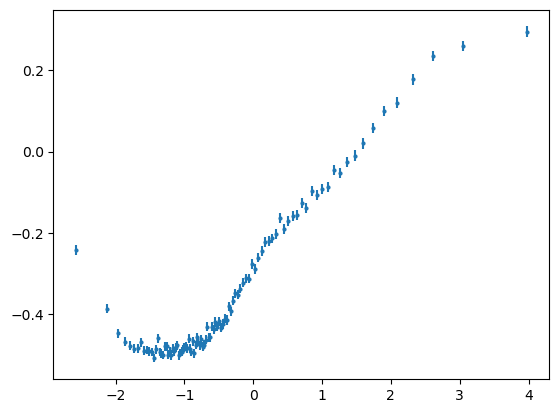

In [263]:
plotquantile(future, past, quantile = 100)

0.011433789207473103


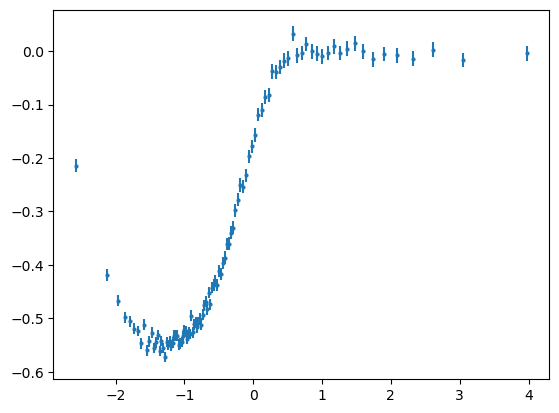

In [264]:
plotquantile(past, future, quantile = 100)

In [259]:
#how many 0, 1, 2 in the X:
print('X: ', np.sum(np.array(X) == 0), np.sum(np.array(X) == 1), np.sum(np.array(X) == 2))

X:  167029 333861 499111


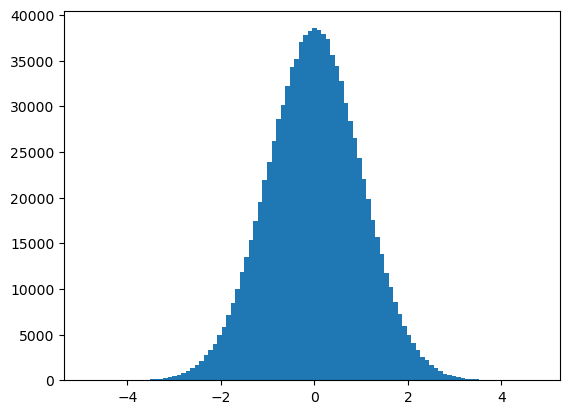

In [266]:
#generate noise
X = [0]
#transition
for i in range(number_of_samples):
    p = np.random.uniform(0, 1)
    X.append(X[-1] * 0.5 + np.random.normal(0, 0.1))
